# Imports and DataFrame Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.power as smp

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [3]:
#Be aware of file directory for loading in the csv.
offense_df=pd.read_csv("TeamOffense/clean_offense_stats.csv")


# Build DataFrames for EDA

In [4]:
#Remove uneeded header column
offense_df=offense_df.iloc[:,1:]


In [5]:
#Make Dataframes for league totals, legue averages, league_avg_game to explore different relationships over time
league_totals=offense_df.loc[offense_df["Tm"]=="League Total"]
league_averages=offense_df.loc[offense_df["Tm"]=="Avg Team"]
league_avg_game=offense_df.loc[offense_df["Tm"]=="Avg Tm/G"]



In [6]:
#I need to create a dataframe that does not contain league totals,averages, and avg team per game info.

ind_teams_offense=offense_df.loc[(offense_df["Tm"]!="League Total")& (offense_df["Tm"]!="Avg Team") & (offense_df["Tm"]!="Avg Tm/G")]

ind_teams_offense.head()

,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year
0,Chicago Bears,12.0,192.0,3317.0,760.0,4.4,21.0,0.0,140.0,73.0,221.0,1221.0,13.0,21.0,5.5,NaN,539.0,2096.0,13.0,3.9,140.0,0.0,354.0,NaN,NaN,NaN,1935.0
1,Detroit Lions,12.0,191.0,2693.0,674.0,4.0,20.0,0.0,121.0,57.0,142.0,920.0,9.0,20.0,6.5,NaN,532.0,1773.0,15.0,3.3,121.0,0.0,195.0,NaN,NaN,NaN,1935.0
2,Green Bay Packers,12.0,181.0,3011.0,678.0,4.4,27.0,0.0,125.0,93.0,230.0,1449.0,11.0,27.0,6.3,NaN,448.0,1562.0,7.0,3.5,125.0,0.0,295.0,NaN,NaN,NaN,1935.0
3,New York Giants,12.0,180.0,2400.0,651.0,3.7,19.0,0.0,112.0,69.0,154.0,947.0,10.0,19.0,6.1,NaN,497.0,1453.0,9.0,2.9,112.0,0.0,175.0,NaN,NaN,NaN,1935.0
4,Pittsburgh Pirates,12.0,100.0,1504.0,561.0,2.7,40.0,0.0,64.0,67.0,234.0,996.0,5.0,40.0,4.3,NaN,327.0,508.0,4.0,1.6,64.0,0.0,201.0,NaN,NaN,NaN,1935.0


In [7]:
#I need to find ppg,turnovers per game for each team in order to do potential statistical testing later.
ind_teams_offense["PPG"]=ind_teams_offense.iloc[:,[2]].values/ind_teams_offense.iloc[:,[1]].values
ind_teams_offense["TO/G"]=ind_teams_offense.iloc[:,[6]].values/ind_teams_offense.iloc[:,[1]].values

C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
ind_teams_offense.head()

,Tm,G,PF,Total_Yds,Ply,Y/P,TO,FL,Total_1stD,Cmp,Pass_Att,Pass_yds,Pass_TD,Int,NY/A,Pass_1stD,Rush_Att,Rush_Yds,Rush_TD,Y/A,Rush_1stD,Pen,Penalty_Yds,Penalty_1stD,Sc%,TO%,Year,PPG,TO/G
0,Chicago Bears,12.0,192.0,3317.0,760.0,4.4,21.0,0.0,140.0,73.0,221.0,1221.0,13.0,21.0,5.5,NaN,539.0,2096.0,13.0,3.9,140.0,0.0,354.0,NaN,NaN,NaN,1935.0,16.000000,1.750000
1,Detroit Lions,12.0,191.0,2693.0,674.0,4.0,20.0,0.0,121.0,57.0,142.0,920.0,9.0,20.0,6.5,NaN,532.0,1773.0,15.0,3.3,121.0,0.0,195.0,NaN,NaN,NaN,1935.0,15.916667,1.666667
2,Green Bay Packers,12.0,181.0,3011.0,678.0,4.4,27.0,0.0,125.0,93.0,230.0,1449.0,11.0,27.0,6.3,NaN,448.0,1562.0,7.0,3.5,125.0,0.0,295.0,NaN,NaN,NaN,1935.0,15.083333,2.250000
3,New York Giants,12.0,180.0,2400.0,651.0,3.7,19.0,0.0,112.0,69.0,154.0,947.0,10.0,19.0,6.1,NaN,497.0,1453.0,9.0,2.9,112.0,0.0,175.0,NaN,NaN,NaN,1935.0,15.000000,1.583333
4,Pittsburgh Pirates,12.0,100.0,1504.0,561.0,2.7,40.0,0.0,64.0,67.0,234.0,996.0,5.0,40.0,4.3,NaN,327.0,508.0,4.0,1.6,64.0,0.0,201.0,NaN,NaN,NaN,1935.0,8.333333,3.333333


# Sampling Distributions

In [9]:
#I need to divide the data into the two sampling distributions for the years prior to the defensive holding rule and after.
#pre_rule_change 1935-1977
#post_rule_change 1978-2020

pre_rule_change = ind_teams_offense.loc[ind_teams_offense["Year"] <1978]
post_rule_change = ind_teams_offense.loc[ind_teams_offense["Year"] >=1978]
print(f"Pre Rule Change Sample Size {len(pre_rule_change)} \nPost Rule Change Sample Size {len(post_rule_change)}")

Pre Rule Change Sample Size 627 
Post Rule Change Sample Size 1297


In [10]:
#I want to access the values and store them as variables.
pre_ppg=pre_rule_change.iloc[:,27].values
post_ppg=post_rule_change.iloc[:,27].values

# EDA

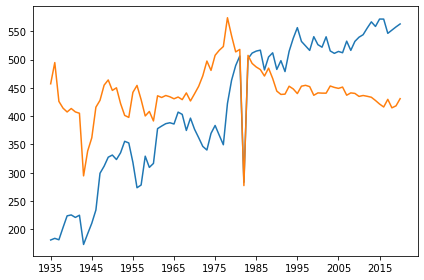

In [11]:
# I used this format to explore different variables over time quickly.
#The for loop allows me to plot multiple y values on the same graph.
# Ultimately I was only interested in exploring NFL scoring over time and the distribution of the two samples.
x=league_averages["Year"]
y=league_averages["Pass_yds"]
y2=league_averages["Rush_Yds"]
y3=league_averages["Penalty_Yds"]
y4=league_averages["Rush_TD"]
y5=league_averages["Pass_TD"]
y6=league_averages["Pass_Att"]
y7=league_averages["Rush_Att"]
y8=league_averages["TO"]
fig,ax=plt.subplots()

for y in [y6,y7]:
    ax.plot(x, y)


plt.xticks(np.arange(min(x), max(x)+1, 10.0))

plt.tight_layout()

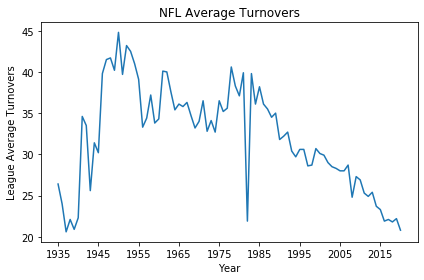

In [12]:
#Turnovers Peak sometime around 1950 and decline consistently 
#I ended up not using this data, but it was interesting to learn that turnovers have declined so significantly.
y=league_averages["TO"]
x=league_averages["Year"]
fig,ax=plt.subplots()
ax.plot(x, y)
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
plt.xlabel("Year")
plt.ylabel("League Average Turnovers")
plt.title("NFL Average Turnovers")
plt.tight_layout()

# NFL Average Points Per Game 1935-2020

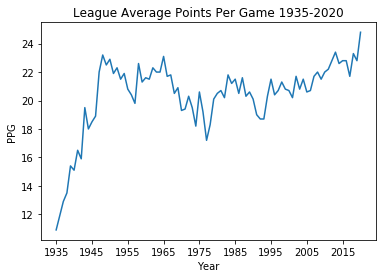

In [25]:
#Plot average points per game of the entire league over time. 
x=league_avg_game["Year"]
y=league_avg_game["PF"]
fig,ax=plt.subplots()
plt.xticks(np.arange(min(x), max(x)+1, 10.0))
ax.plot(x,y)
plt.xlabel("Year")
plt.ylabel("PPG")
plt.title("League Average Points Per Game 1935-2020");

# Histogram of Samples

C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\natha\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\natha\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\natha\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


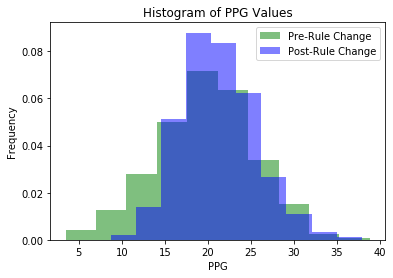

In [14]:
# I want to plot the two samples together to investigate the relationship.
x_pre=pre_ppg
x_post=post_ppg
fig,ax=plt.subplots()

#normalize to help with sample size difference
plt.hist(x_pre, color='g', label='Pre-Rule Change',alpha=0.5,normed=True)
plt.hist(x_post, color='b', label='Post-Rule Change',alpha=0.5,normed=True)

plt.title("Histogram of PPG Values")
plt.xlabel('PPG')
plt.ylabel('Frequency')
plt.legend();

# Power

In [15]:
#I need to confirm I have enough statistical power to proceed with hypothesis testing
#I will need some summary stats from the ppg column I made, so I will do that and then store them as variables
mu_pre=19.718861
n_pre=625
sigma_pre =5.645189

pre_rule_change.iloc[:,27].describe()


count    625.000000
mean      19.718861
std        5.645189
min        3.454545
25%       16.071429
50%       20.000000
75%       23.285714
max       38.833333
Name: PPG, dtype: float64

In [16]:
mu_post=21.247439
n_post=1297
sigma_post= 4.333372
post_rule_change.iloc[:,27].describe()

count    1297.000000
mean       21.247439
std         4.333372
min         8.750000
25%        18.125000
50%        21.062500
75%        24.062500
max        37.875000
Name: PPG, dtype: float64

In [17]:
#I need to get population stdev
sigma_pre_plus_post=4.851122
ind_teams_offense.iloc[:,27].describe()

count    1922.000000
mean       20.750373
std         4.851122
min         3.454545
25%        17.571429
50%        20.781746
75%        23.812500
max        38.833333
Name: PPG, dtype: float64

In [24]:
#Calculate effect size
#difference in two sample means/stdev of both
#0.31 is a moderate effect

effect_size_samples=(mu_post-mu_pre)/sigma_pre_plus_post
effect_size_samples

0.31509782685325155

In [19]:
#Statsmodels has a builtin for 
#I need the ratio between sample sizes so I can account for sample size differences.
ratio_for_power=n_pre/n_post

smp.tt_ind_solve_power(effect_size=effect_size_samples, nobs1=n_pre, alpha=0.05, ratio=ratio_for_power,alternative='two-sided')


0.9942553713378007

# Hypothesis Testing

In [20]:
#I will use the scipy stats module built-in to calculate my hypothesis.
#Welch adjustment requires that equal_var=False. This accounts for the difference in sample size

# pvalue is 3.22*10^-9 or 0.00000000322
stats.ttest_ind(pre_ppg, post_ppg, axis=0,nan_policy='omit', equal_var=False)

Ttest_indResult(statistic=-5.974142591912258, pvalue=3.222397308158082e-09)

# Conclusion


### At the significance level of 0.05, and with a p-value of 3.22*10^-9, I reject the null hypothesis that the means of the two samples are not significantly different.